Loading data...
Processing missing data...
Data after processing missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           72274 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 72274 non-null  float64
 8   upload_avg                   72274 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None
P

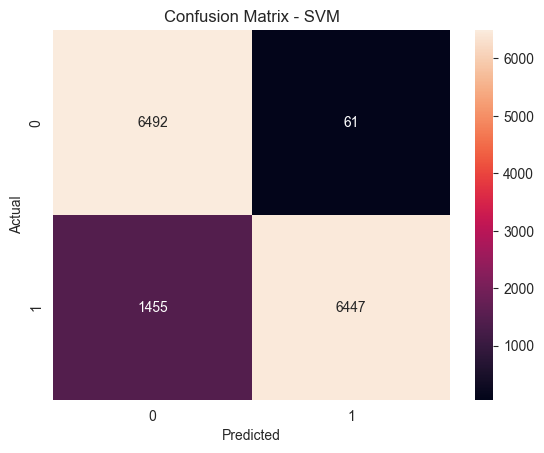

Evaluating Random Forest...
Random Forest Results:
Accuracy: 0.97
Recall: 0.97
Precision: 0.98
F1 Score: 0.97


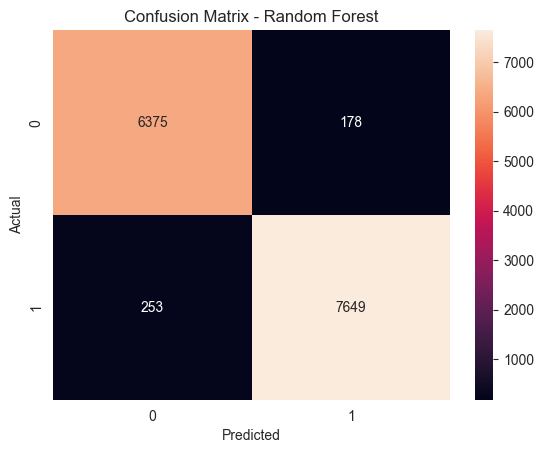

Evaluating Logistic Regression...
Logistic Regression Results:
Accuracy: 0.89
Recall: 0.86
Precision: 0.93
F1 Score: 0.89


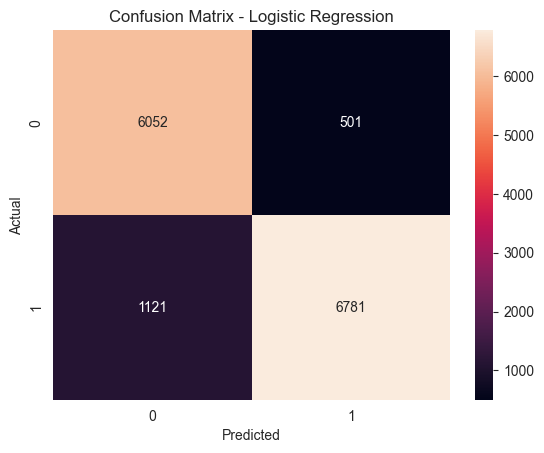

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
print("Loading data...")
data = pd.read_csv('./data/internet_service_churn.csv')

# 2. Handling Missing Data
print("Processing missing data...")

def process_missing_data(df, threshold=3):
    """
    Function to process missing data.
    If a row has 3 or fewer missing values, they are filled with mean values.
    If a row has more than 3 missing values, it is dropped.
    """
    # Drop rows where the number of missing values exceeds the threshold
    df.dropna(thresh=len(df.columns) - threshold, inplace=True)
    
    # Fill remaining missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    df[:] = imputer.fit_transform(df)
    
    return df

# Process missing data
data = process_missing_data(data)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

print("Data after processing missing values:")
print(data.info())

# 3. Data Preparation for Modeling

# Splitting data into features (X) and target variable (y)
X = data.drop(columns=['churn'])
y = data['churn']

# Encoding categorical variables (if any)
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Normalizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Cross-Validation, SVM, Random Forest, and Logistic Regression

# Support Vector Machine (SVM) Model with linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Logistic Regression Model (simpler model for comparison)
lr_model = LogisticRegression(random_state=42)

# Perform Cross-Validation and print results
def perform_cross_validation(model, X, y, cv=3):  # Reduced to 3 folds
    print(f"Performing cross-validation for {model.__class__.__name__}...")
    # Cross-validation for accuracy
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f"Cross-Validation Results for {model.__class__.__name__}:")
    print(f"Accuracy: {np.mean(accuracy):.2f} (+/- {np.std(accuracy):.2f})")
    print("-" * 50)

# Perform cross-validation for both models
perform_cross_validation(svm_model, X, y)
perform_cross_validation(rf_model, X, y)
perform_cross_validation(lr_model, X, y)

# 5. Training and Evaluating the Models

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model with linear kernel
print("Training SVM model...")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train the Logistic Regression model
print("Training Logistic Regression model...")
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 6. Model Evaluation

def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluating {model_name}...")
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Displaying the results
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate SVM Model
evaluate_model(y_test, y_pred_svm, "SVM")

# Evaluate Random Forest Model
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Logistic Regression Model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
